In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sklearn as sk
import seaborn as sns


from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
import os
from pathlib import Path


In [9]:
file_dir = os.getcwd()
folder_name = "Datasets\\5. PHQ9_GAD7"
filename = "PHQ9_GAD7_df.csv"
file_path = os.path.join(file_dir, folder_name, filename)

c:\Users\asus\Desktop\Masters\2nd year\cognitive and behavioral\Cognitive-behavioral-social-data\Datasets\5. PHQ9_GAD7\PHQ9_GAD7_df.csv


In [10]:
# Import Dataset
df = pd.read_csv(file_path, sep = ";")
df

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,CONDITION
0,3,1,1,3,1,1,2,1,2,2,3,2,2,2,3,2,H
1,2,1,3,3,1,1,3,1,5,3,3,3,2,1,3,5,H
2,3,2,2,3,4,3,2,2,2,3,2,3,3,3,3,3,H
3,2,2,4,3,2,4,1,4,4,2,4,4,1,1,1,3,H
4,2,2,5,2,4,3,4,2,4,3,2,5,3,1,5,2,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,5,5,5,5,4,5,5,5,5,5,5,5,5,4,5,5,D
1114,4,4,5,4,4,4,2,4,5,5,5,5,5,4,3,5,D
1115,5,5,4,5,5,4,4,4,4,5,5,5,5,4,4,5,D
1116,4,4,5,5,4,4,3,4,2,5,4,4,5,4,4,5,D


In [11]:
# Check that dataset is balanced and define predictors and target
df['CONDITION'].value_counts()


H    559
D    559
Name: CONDITION, dtype: int64

In [12]:
X = df.iloc[:,:-1]
y = df["CONDITION"]

# Feature selection

# Supervised

### Decision tree classifier

Feature: 0, Score: 0.01199
Feature: 1, Score: 0.11530
Feature: 2, Score: 0.01261
Feature: 3, Score: 0.02277
Feature: 4, Score: 0.00521
Feature: 5, Score: 0.00616
Feature: 6, Score: 0.04161
Feature: 7, Score: 0.74754
Feature: 8, Score: 0.00149
Feature: 9, Score: 0.01011
Feature: 10, Score: 0.00492
Feature: 11, Score: 0.00179
Feature: 12, Score: 0.00447
Feature: 13, Score: 0.01223
Feature: 14, Score: 0.00179
Feature: 15, Score: 0.00000


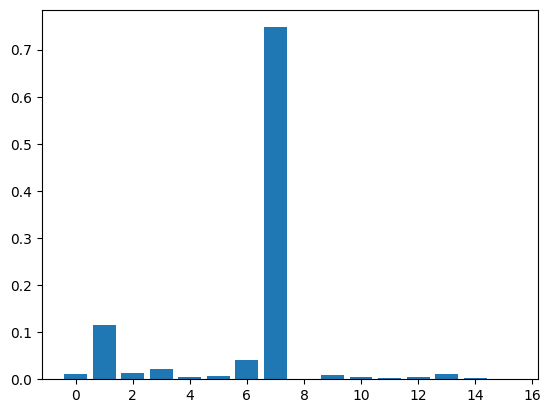

In [13]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest

Feature: 0, Score: 0.10736
Feature: 1, Score: 0.15165
Feature: 2, Score: 0.03476
Feature: 3, Score: 0.01370
Feature: 4, Score: 0.01707
Feature: 5, Score: 0.08726
Feature: 6, Score: 0.11010
Feature: 7, Score: 0.28850
Feature: 8, Score: 0.00356
Feature: 9, Score: 0.04080
Feature: 10, Score: 0.00849
Feature: 11, Score: 0.00403
Feature: 12, Score: 0.05430
Feature: 13, Score: 0.01056
Feature: 14, Score: 0.00513
Feature: 15, Score: 0.06275


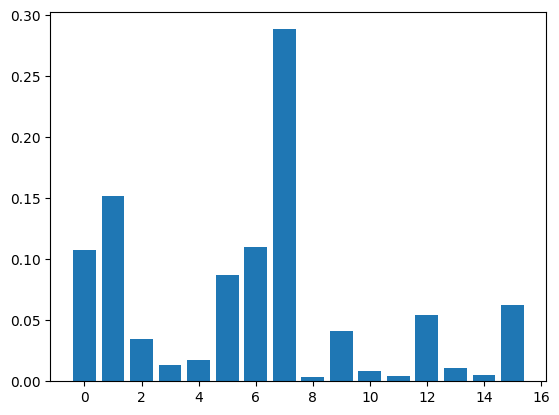

In [14]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### XGBoost

Feature: 0, Score: 0.04798
Feature: 1, Score: 0.15459
Feature: 2, Score: 0.01410
Feature: 3, Score: 0.03206
Feature: 4, Score: 0.00384
Feature: 5, Score: 0.01521
Feature: 6, Score: 0.06359
Feature: 7, Score: 0.56513
Feature: 8, Score: 0.00184
Feature: 9, Score: 0.01428
Feature: 10, Score: 0.00967
Feature: 11, Score: 0.00450
Feature: 12, Score: 0.03599
Feature: 13, Score: 0.01882
Feature: 14, Score: 0.00316
Feature: 15, Score: 0.01523


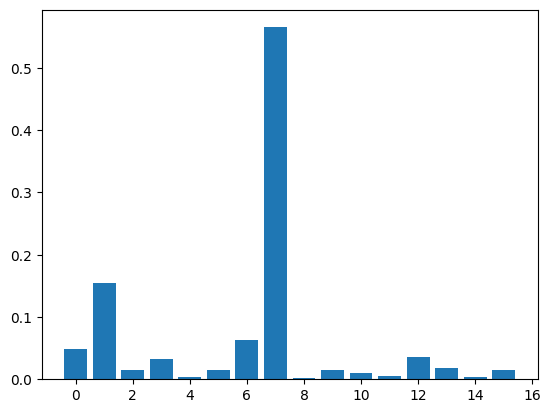

In [15]:
# define the model
model = XGBClassifier()
# Label encoding
df["CONDITION_ENC"] = df["CONDITION"].replace({"H": 1, "D" : 0})
X_enc = df.iloc[:,:-2]
y_enc = df["CONDITION_ENC"]
# fit the model
model.fit(X_enc, y_enc)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Permutation feature importance with knn for classification

Feature: 0, Score: 0.00233
Feature: 1, Score: 0.00268
Feature: 2, Score: 0.00179
Feature: 3, Score: 0.00089
Feature: 4, Score: 0.00018
Feature: 5, Score: 0.00429
Feature: 6, Score: 0.00358
Feature: 7, Score: 0.01556
Feature: 8, Score: 0.00054
Feature: 9, Score: 0.00179
Feature: 10, Score: 0.00125
Feature: 11, Score: 0.00036
Feature: 12, Score: 0.00233
Feature: 13, Score: 0.00662
Feature: 14, Score: 0.00161
Feature: 15, Score: 0.00215


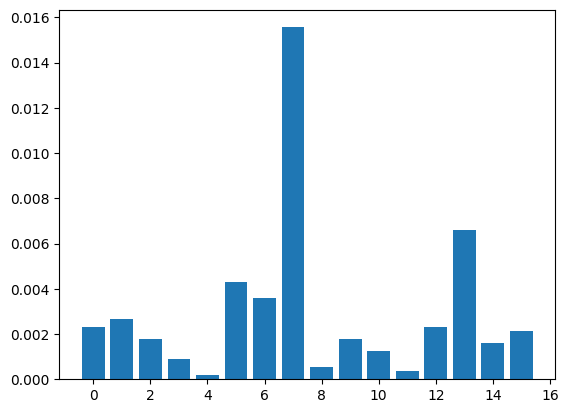

In [16]:
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

### Chi-Squared Feature Selection

Feature 0: 300.430475
Feature 1: 538.162631
Feature 2: 216.027985
Feature 3: 189.247352
Feature 4: 277.460635
Feature 5: 380.386792
Feature 6: 515.853257
Feature 7: 555.015200
Feature 8: 111.730345
Feature 9: 252.019352
Feature 10: 132.487384
Feature 11: 115.477409
Feature 12: 404.291682
Feature 13: 273.307395
Feature 14: 172.805477
Feature 15: 206.334215


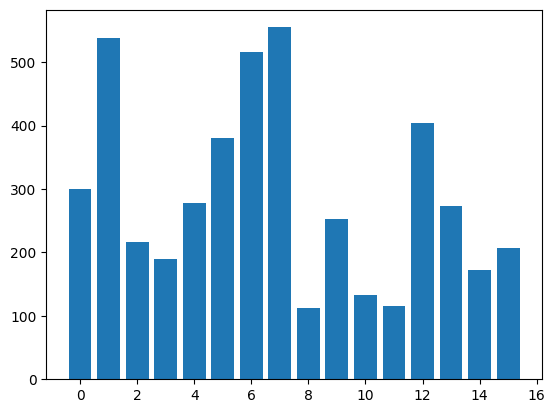

In [18]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Mutual Information Feature Selection

Feature 0: 0.394925
Feature 1: 0.497260
Feature 2: 0.355386
Feature 3: 0.331748
Feature 4: 0.345754
Feature 5: 0.426412
Feature 6: 0.487681
Feature 7: 0.514103
Feature 8: 0.096577
Feature 9: 0.430200
Feature 10: 0.316132
Feature 11: 0.235983
Feature 12: 0.412360
Feature 13: 0.276876
Feature 14: 0.272081
Feature 15: 0.405736


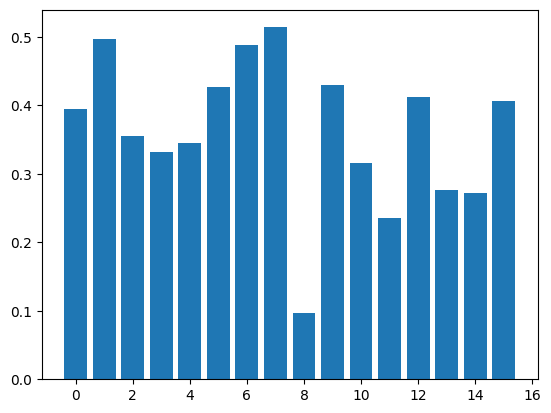

In [19]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Unsupervised

### Correlation

C:\Users\asus\AppData\Local\Temp\ipykernel_848\4090766017.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


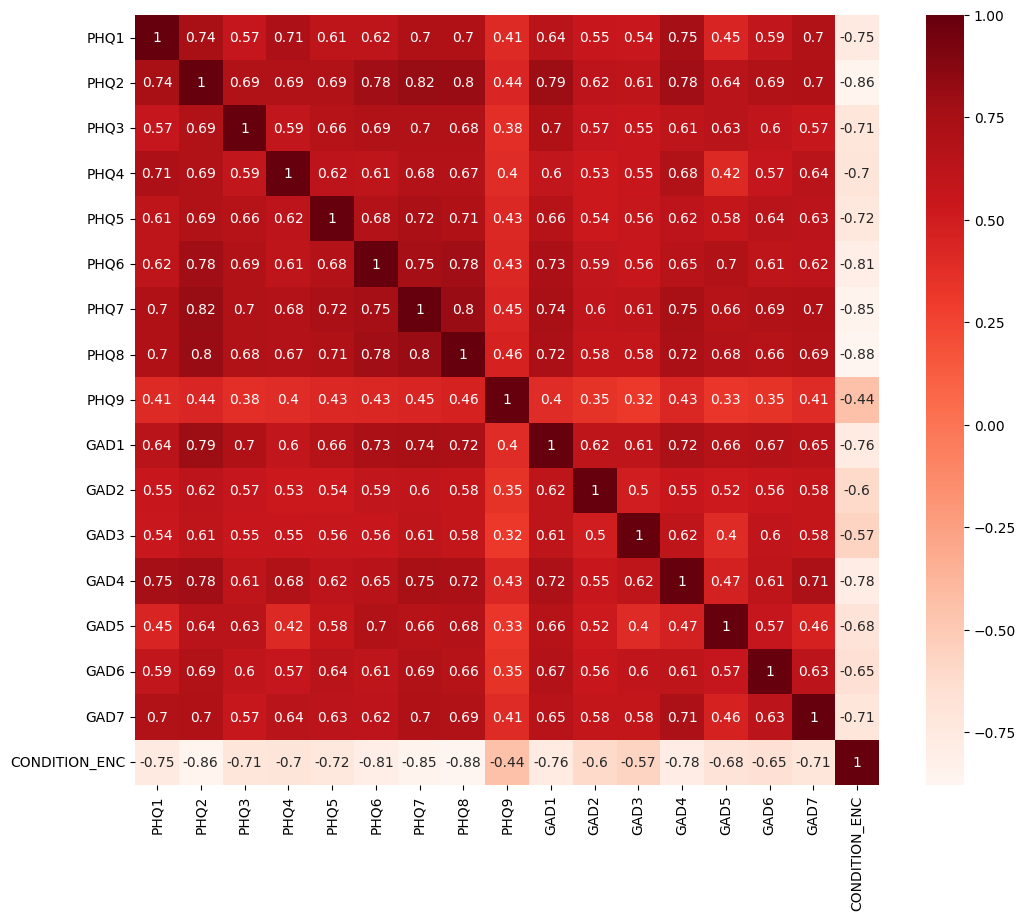

In [20]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Dimensionality reduction

### Cumulative explained variance vs number of components

Text(0, 0.5, 'Cumulative explained variance')

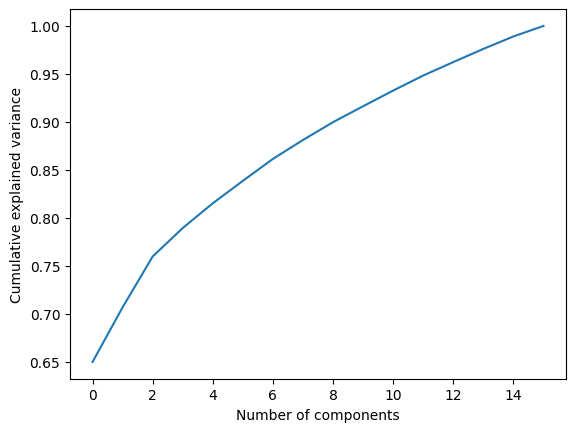

In [21]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
#plt.savefig('pca_analysis.png')

## PCA

In [22]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X_enc)
Scaled_data=scaling.transform(X_enc)
 
# Set the n_components=3
principal = PCA(n_components=10)
principal.fit(Scaled_data)
X_pca = principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

NameError: name 'x' is not defined